# Sprint 5
## Tasca M5 T02

### Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

cols=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df=pd.read_csv('housing data.csv', sep=',',encoding='unicode-escape',names=cols)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state = 7)

In [58]:
def vardesc(var):
    nulls=var.isna().sum().sort_values()
    desc=var.select_dtypes(include=['float64', 'int']).describe().round(2)
    print(var.shape,'\n','Nombre de valors nuls al subdataset:','\n',nulls,'\n')
    print(var.info(),'\n')
    display(desc)
    
vardesc(X_train)

(404, 14) 
 Nombre de valors nuls al subdataset: 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 355 to 175
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(12), int64(2)
memory 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.40,11.39,11.07,0.07,0.55,6.27,68.35,3.82,9.09,401.95,18.39,359.05,12.76,22.52
std,8.21,23.41,7.01,0.25,0.12,0.71,28.32,2.13,8.51,166.37,2.17,87.17,7.28,9.25
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.14,1.00,187.00,12.60,2.52,1.73,5.00
25%,0.08,0.00,5.08,0.00,0.45,5.88,44.15,2.09,4.00,277.00,17.00,376.14,7.09,16.95
50%,0.22,0.00,8.56,0.00,0.53,6.18,76.95,3.28,5.00,330.00,18.80,391.96,11.43,20.95
75%,2.66,12.50,18.10,0.00,0.62,6.62,94.52,5.21,8.00,666.00,20.20,396.35,17.11,25.08
max,88.98,100.00,27.74,1.00,0.87,8.72,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


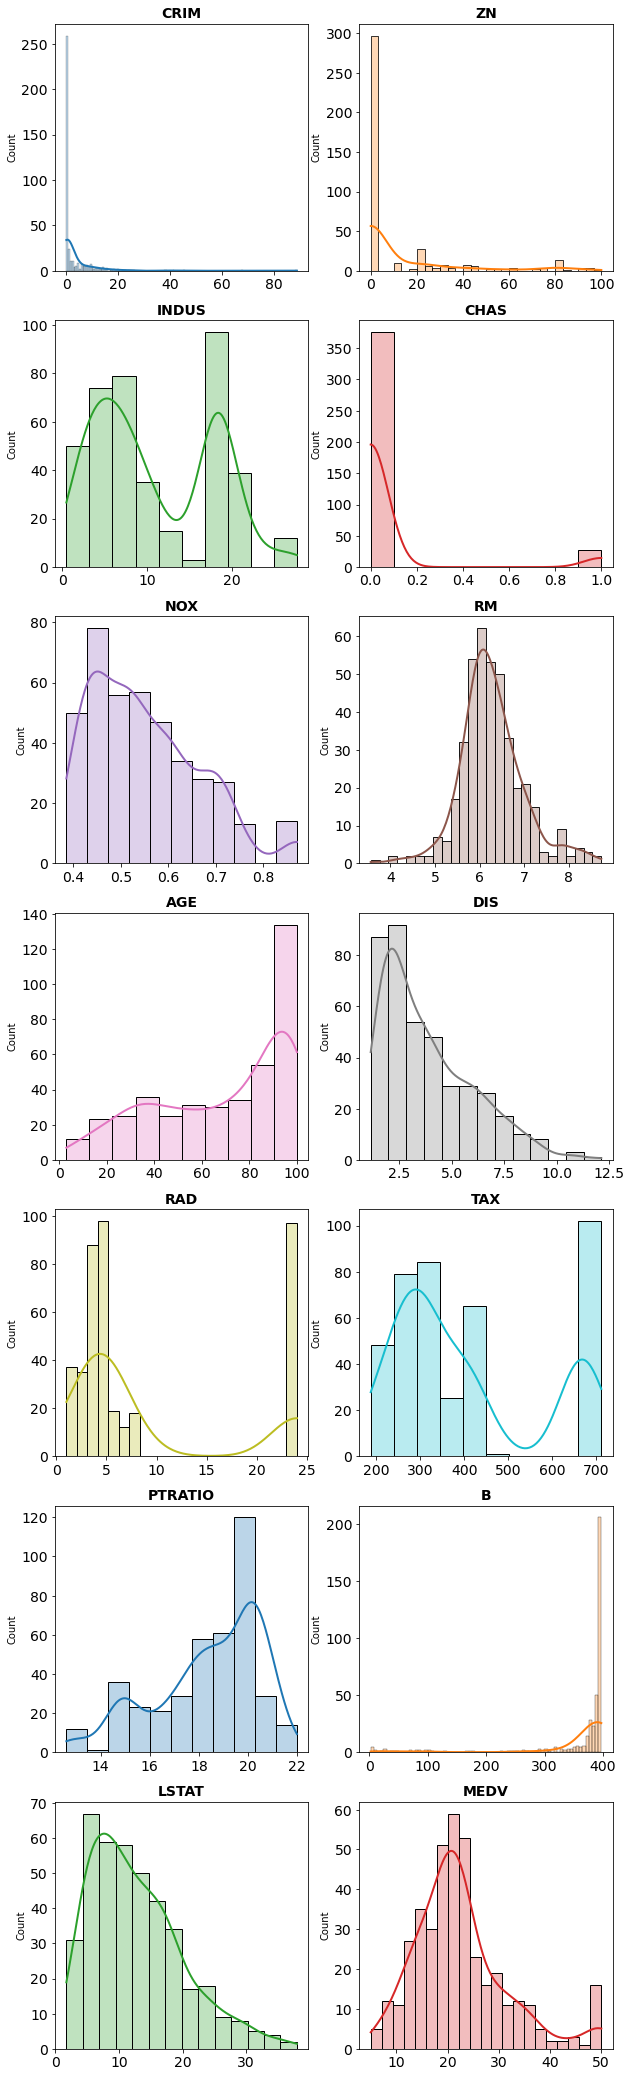

In [65]:
# Distribution graph for each numerical variable

df1=X_train

fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(10, 15))
axes = axes.flat
columnas_numeric = df1.select_dtypes(include=['float64', 'int']).columns

for i, column in enumerate(columnas_numeric):
    sns.histplot(
        data    = df1,
        x       = column,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(column, fontsize = 14, fontweight = "bold")
    axes[i].tick_params(labelsize = 14)
    axes[i].set_xlabel("")

plt.subplots_adjust(top = 2)

Text(0.5, 0.98, 'Heatmap Correlation Matrix for X_train')

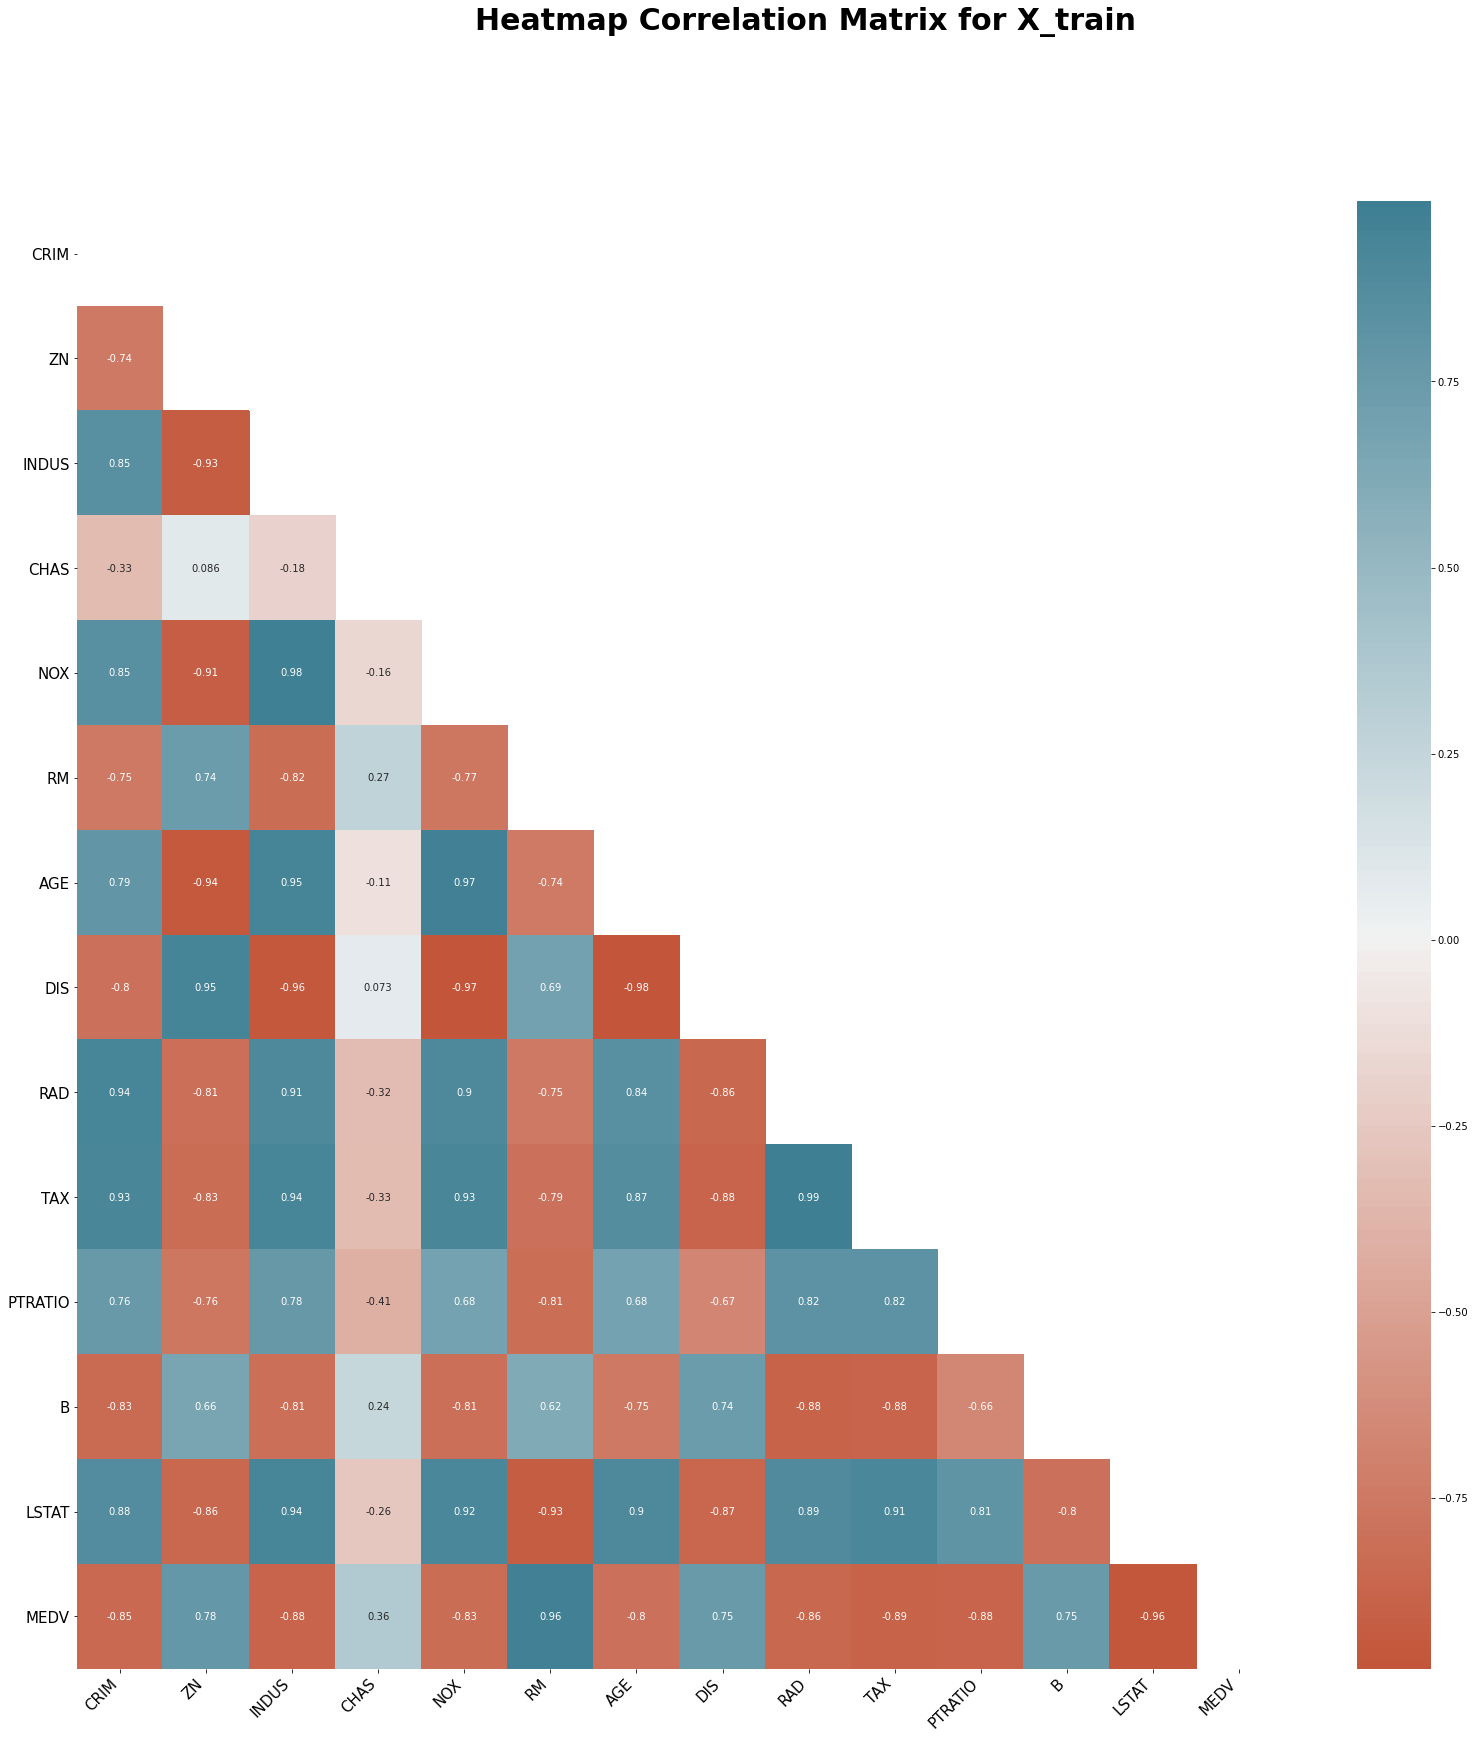

In [181]:
# Heatmap matrix of correlations

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(27, 27))

corr= df1.select_dtypes(include=['float64', 'int']).corr(method='pearson').corr()

matrix = np.triu(corr)

sns.heatmap(corr, 
            annot=True, 
            mask=matrix, 
            cmap=sns.diverging_palette(20, 220, n=200),
            annot_kws = {"size": 10})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)

fig.suptitle('Heatmap Correlation Matrix for X_train', fontsize = 30, fontweight = "bold")

In [63]:
vardesc(X_test)

(102, 14) 
 Nombre de valors nuls al subdataset: 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 357 to 26
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(12), int64(2)
memory u

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,4.45,11.26,11.41,0.07,0.57,6.34,69.45,3.70,11.36,433.16,18.73,347.26,12.22,22.57
std,9.99,23.10,6.28,0.25,0.12,0.69,27.58,2.00,9.28,175.49,2.14,106.03,6.59,9.03
min,0.02,0.00,0.74,0.00,0.39,3.86,6.00,1.13,1.00,222.00,13.00,0.32,2.88,6.30
25%,0.09,0.00,5.70,0.00,0.47,5.95,50.18,2.15,4.00,289.00,17.40,371.81,6.80,17.35
50%,0.50,0.00,9.90,0.00,0.54,6.27,80.60,3.03,6.00,342.50,19.70,390.80,11.18,21.80
75%,4.84,20.00,18.10,0.00,0.66,6.65,91.78,4.93,24.00,666.00,20.20,395.66,15.50,24.80
max,73.53,95.00,21.89,1.00,0.87,8.78,100.00,10.59,24.00,666.00,22.00,396.90,30.62,50.00


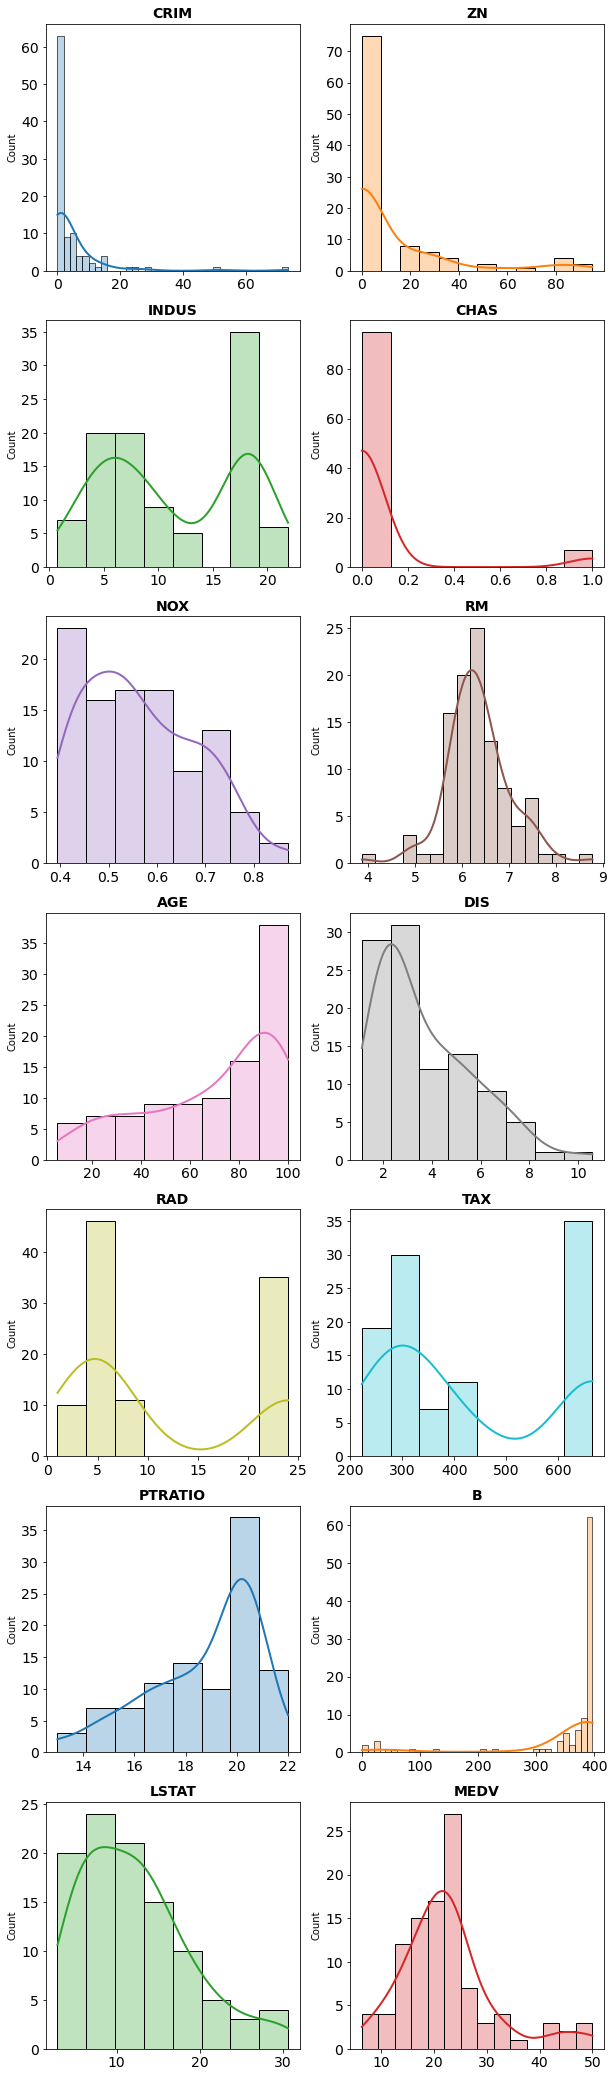

In [67]:
# Distribution graph for each numerical variable

df2=X_test

fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(10, 15))
axes = axes.flat
columnas_numeric = df2.select_dtypes(include=['float64', 'int']).columns


for ii, column in enumerate(columnas_numeric):
    sns.histplot(
        data    = df2,
        x       = column,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[ii]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[ii]
    )
    axes[ii].set_title(column, fontsize = 14, fontweight = "bold")
    axes[ii].tick_params(labelsize = 14)
    axes[ii].set_xlabel("")
    
plt.subplots_adjust(top = 2)

Text(0.5, 0.98, 'Heatmap Correlation Matrix for X_test')

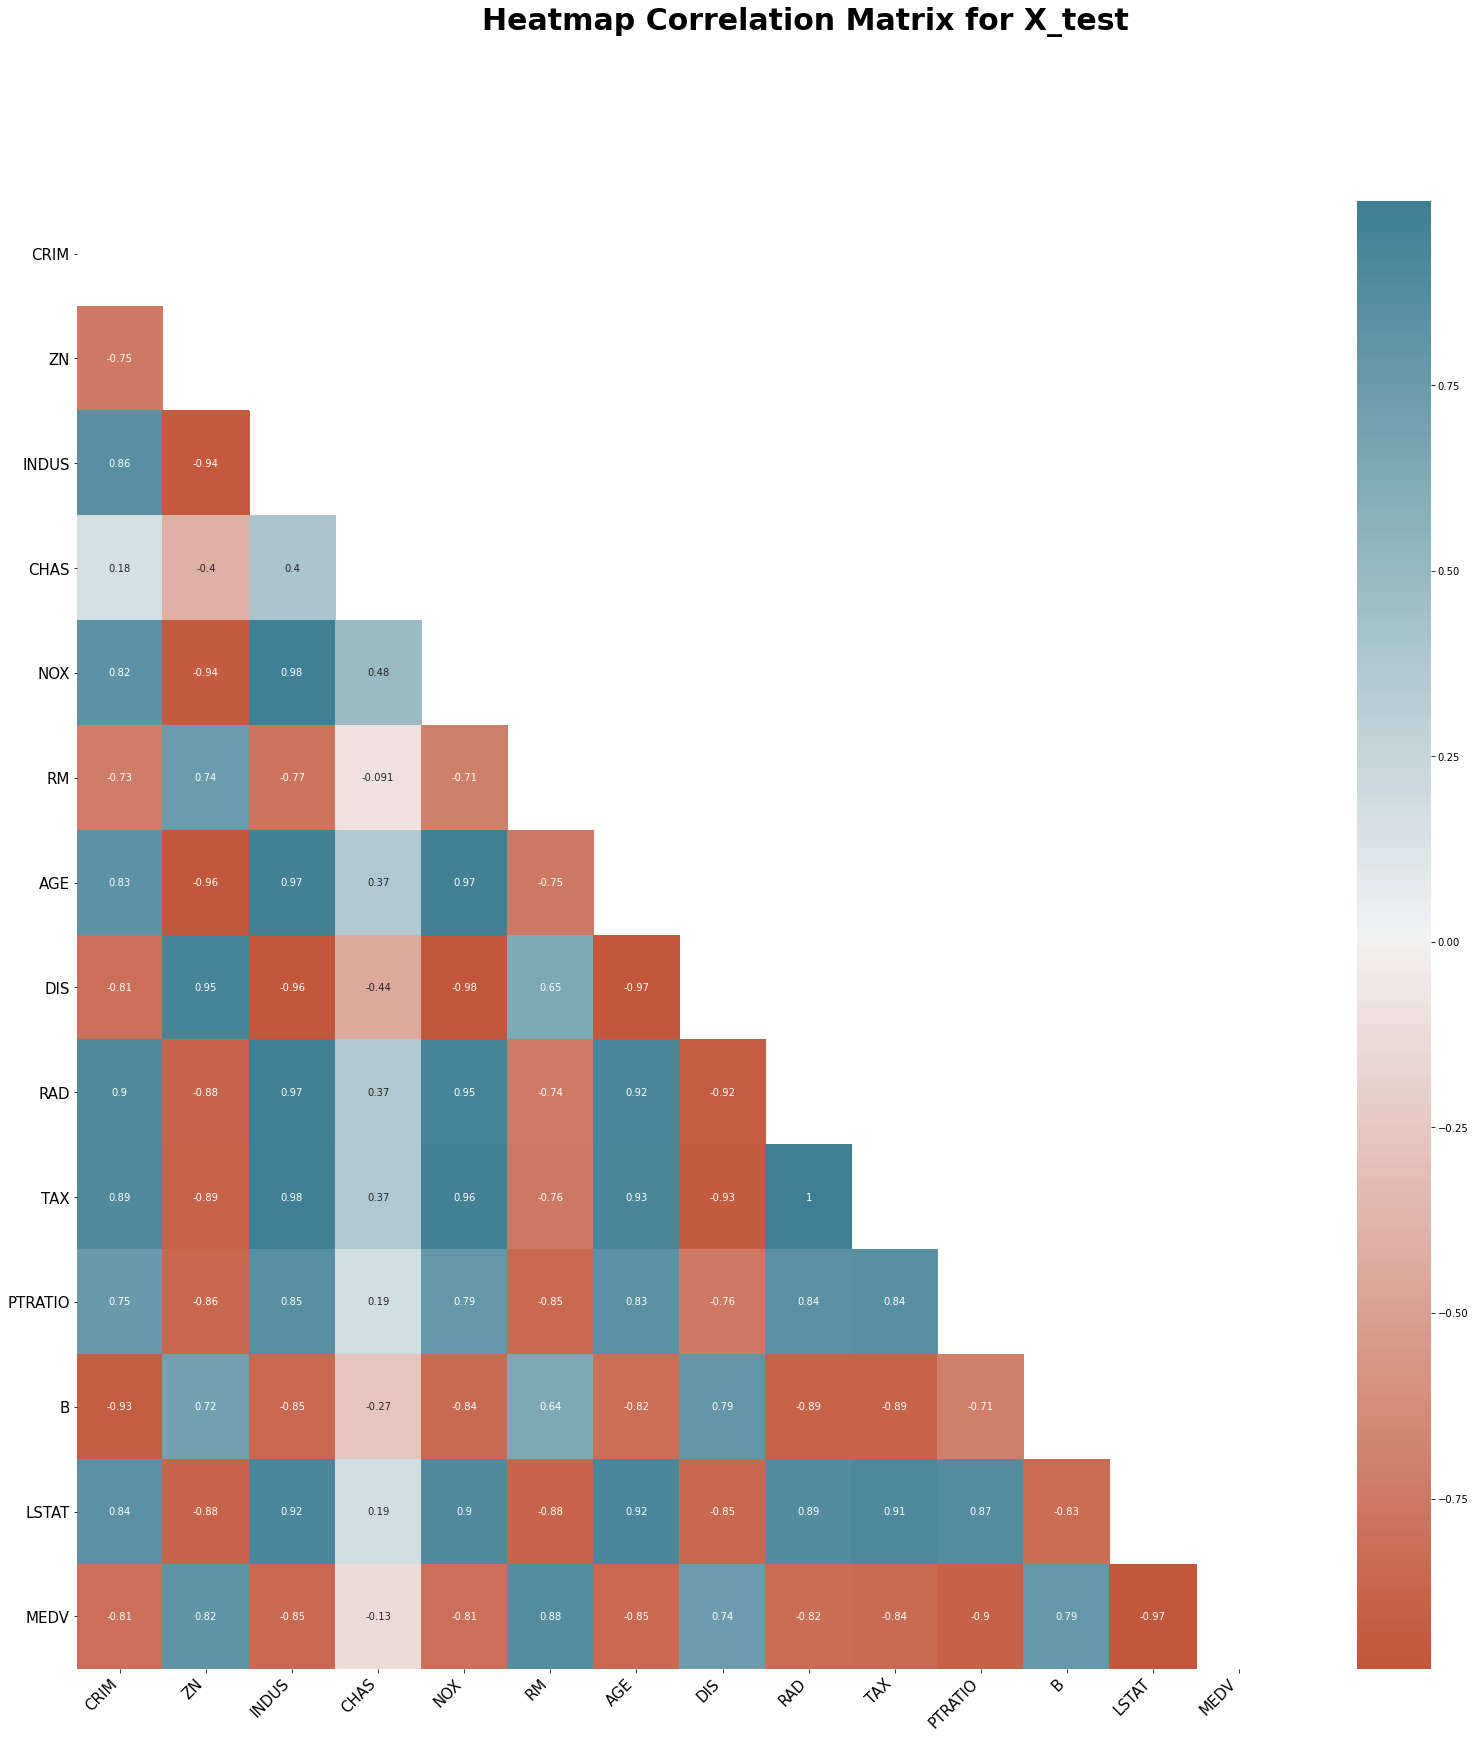

In [182]:
# Heatmap matrix of correlations

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(27, 27))

corr= df2.select_dtypes(include=['float64', 'int']).corr(method='pearson').corr()

matrix = np.triu(corr)

sns.heatmap(corr, 
            annot=True, 
            mask=matrix, 
            cmap=sns.diverging_palette(20, 220, n=200),
            annot_kws = {"size": 10})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)

fig.suptitle('Heatmap Correlation Matrix for X_test', fontsize = 30, fontweight = "bold")

- Veiem en l'anàlisis descriptiu que les tendències generals i histogrames de les variables són similars entre train i test però hi ha alguna diferència a l'hora de les distribucions ja que en el cas del test, el nombre de valors es bastant més petit que el de train. A més, podem veure als heatmaps que les correlacions no varien exageradament en la majoria de casos.

### Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [135]:
chas_dummy = pd.get_dummies(X_train['CHAS'], prefix='CHAS')
dfD = pd.concat([X_train, chas_dummy], axis=1)
dfD = dfD.drop('CHAS', axis=1) # remove the original column
dfD

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
355,0.10659,80.0,1.91,0.413,5.936,19.5,10.5857,4,334.0,22.0,376.04,5.57,20.6,1,0
460,4.81213,0.0,18.10,0.713,6.701,90.0,2.5975,24,666.0,20.2,255.23,16.42,16.4,1,0
120,0.06899,0.0,25.65,0.581,5.870,69.7,2.2577,2,188.0,19.1,389.15,14.37,22.0,1,0
346,0.06162,0.0,4.39,0.442,5.898,52.3,8.0136,3,352.0,18.8,364.61,12.67,17.2,1,0
457,8.20058,0.0,18.10,0.713,5.936,80.3,2.7792,24,666.0,20.2,3.50,16.94,13.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0.409,5.878,21.4,6.4980,4,345.0,18.9,396.21,8.10,22.0,1,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,1,0
25,0.84054,0.0,8.14,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9,1,0
196,0.04011,80.0,1.52,0.404,7.287,34.1,7.3090,2,329.0,12.6,396.90,4.08,33.3,1,0


In [174]:
rad_dummy = pd.get_dummies(X_train['RAD'], prefix='RAD')
dfD2 = pd.concat([X_train, rad_dummy], axis=1)
dfD2 = dfD2.drop('RAD', axis=1) # remove the original column
dfD2 = pd.concat([dfD2,chas_dummy], axis=1)
dfD2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,CHAS_0,CHAS_1
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,334.0,22.0,...,0,0,1,0,0,0,0,0,1,0
460,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,666.0,20.2,...,0,0,0,0,0,0,0,1,1,0
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,188.0,19.1,...,1,0,0,0,0,0,0,0,1,0
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,352.0,18.8,...,0,1,0,0,0,0,0,0,1,0
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,666.0,20.2,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,345.0,18.9,...,0,0,1,0,0,0,0,0,1,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,...,0,0,0,0,0,0,0,0,1,0
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,307.0,21.0,...,0,0,1,0,0,0,0,0,1,0
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,329.0,12.6,...,1,0,0,0,0,0,0,0,1,0


- Dummy columns afegidas en referència a les columnes CHAS i RAD que hem vist que en l'anterior exploració de dades poden assolir un grup reduït de valors.

In [141]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_trainS=pd.DataFrame(X_scaled,columns=cols)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_trainS.drop('MEDV', axis=1))
df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(X_trainS.columns[:-1]))

# Add the target variable back to the dataframe
df_poly['MEDV'] = X_trainS['MEDV']
df_poly.round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2,MEDV
0,-0.40,2.94,-1.31,-0.27,-1.20,-0.47,-1.73,3.18,-0.60,-0.41,...,-0.68,-0.08,0.40,2.78,0.33,-1.65,0.04,-0.19,0.98,-0.21
1,0.17,-0.49,1.00,-0.27,1.40,0.61,0.77,-0.57,1.75,1.59,...,1.33,-1.89,0.80,0.70,-1.00,0.42,1.42,-0.60,0.25,-0.66
2,-0.41,-0.49,2.08,-0.27,0.25,-0.57,0.05,-0.73,-0.83,-1.29,...,-0.42,-0.45,-0.28,0.11,0.11,0.07,0.12,0.08,0.05,-0.06
3,-0.41,-0.49,-0.95,-0.27,-0.95,-0.53,-0.57,1.97,-0.72,-0.30,...,-0.06,-0.02,0.00,0.04,0.01,-0.00,0.00,-0.00,0.00,-0.58
4,0.58,-0.49,1.00,-0.27,1.40,-0.47,0.42,-0.49,1.75,1.59,...,1.33,-6.49,0.91,0.70,-3.42,0.48,16.68,-2.35,0.33,-0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.41,0.05,-0.71,-0.27,-1.24,-0.56,-1.66,1.26,-0.60,-0.34,...,-0.08,-0.15,0.22,0.06,0.10,-0.15,0.18,-0.27,0.41,-0.06
400,-0.41,-0.49,0.12,-0.27,0.18,-0.21,0.30,-0.72,-0.95,-0.78,...,-0.94,-0.34,0.39,1.45,0.52,-0.61,0.19,-0.22,0.26,-0.21
401,-0.31,-0.49,-0.42,-0.27,-0.12,-0.95,0.61,0.30,-0.60,-0.57,...,-0.69,0.37,-0.29,1.45,-0.77,0.62,0.41,-0.33,0.27,-0.93
402,-0.41,2.94,-1.36,-0.27,-1.28,1.44,-1.21,1.64,-0.83,-0.44,...,1.17,-0.19,0.52,7.13,-1.16,3.19,0.19,-0.52,1.43,1.17


- Creació de múltiples columnes a partir dels polinomis de grau 2 i estandaritzades amb StandardScaler() (mitjana igual a zero).

### Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [126]:
def tidy_corr_matrix(corr_mat):
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


corr_matrix = X_trainS.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(22)

,variable_1,variable_2,r,abs_r
134,TAX,RAD,0.895147,0.895147
121,RAD,TAX,0.895147,0.895147
102,DIS,NOX,-0.765258,0.765258
63,NOX,DIS,-0.765258,0.765258
32,INDUS,NOX,0.755818,0.755818
58,NOX,INDUS,0.755818,0.755818
187,MEDV,RM,0.748919,0.748919
83,RM,MEDV,0.748919,0.748919
91,AGE,DIS,-0.745199,0.745199
104,DIS,AGE,-0.745199,0.745199


In [161]:
display(chas_dummy.describe().round(2))
display(rad_dummy.describe().round(2))
display(df_poly.describe().round(2))

,CHAS_0,CHAS_1
count,404.00,404.00
mean,0.93,0.07
std,0.25,0.25
min,0.00,0.00
25%,1.00,0.00
50%,1.00,0.00
75%,1.00,0.00
max,1.00,1.00


,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.04,0.05,0.09,0.22,0.24,0.05,0.03,0.04,0.24
std,0.21,0.21,0.28,0.41,0.43,0.21,0.17,0.21,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2,MEDV
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,...,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,...,0.45,-0.44,0.55,1.00,-0.17,0.37,1.00,-0.37,1.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.73,1.38,1.05,1.29,0.93,0.95,3.17,1.37,1.58,1.00
min,-0.41,-0.49,-1.52,-0.27,-1.44,-3.84,-2.31,-1.26,-0.95,-1.29,...,-0.94,-6.51,-2.57,0.00,-3.84,-3.87,0.00,-11.28,0.00,-1.90
25%,-0.41,-0.49,-0.86,-0.27,-0.90,-0.56,-0.86,-0.81,-0.60,-0.75,...,-0.05,-0.34,-0.00,0.11,-0.32,-0.08,0.10,-0.34,0.13,-0.60
50%,-0.39,-0.49,-0.36,-0.27,-0.17,-0.14,0.30,-0.25,-0.48,-0.43,...,0.26,-0.19,0.34,0.70,0.00,0.21,0.16,-0.15,0.51,-0.17
75%,-0.09,0.05,1.00,-0.27,0.63,0.49,0.93,0.65,-0.13,1.59,...,1.33,0.00,0.87,1.45,0.25,0.76,0.19,0.07,1.20,0.28
max,10.43,3.79,2.38,3.66,2.77,3.48,1.12,3.90,1.75,1.86,...,2.71,0.81,5.51,7.13,5.28,3.87,16.77,1.51,12.03,2.97


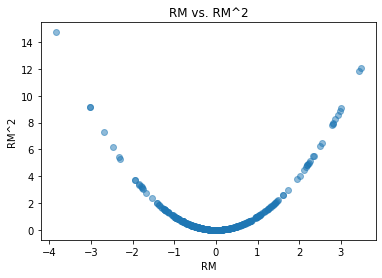

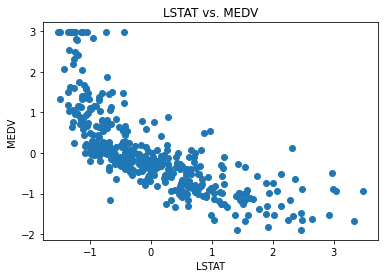

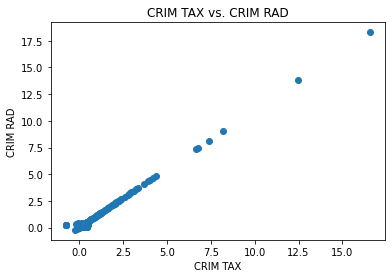

In [171]:
# Select columns for plotting
x = df_poly['RM']
y1 = df_poly['RM^2']
y2 = df_poly['LSTAT']
y3 = df_poly['MEDV']
y4 = df_poly['CRIM TAX']
y5 = df_poly['CRIM RAD']

# Create scatter plots
plt.scatter(x, y1, alpha=0.5)
plt.xlabel('RM')
plt.ylabel('RM^2')
plt.title('RM vs. RM^2')
plt.show()

plt.scatter(y2, y3)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('LSTAT vs. MEDV')
plt.show()

plt.scatter(y4, y5)
plt.xlabel('CRIM TAX')
plt.ylabel('CRIM RAD')
plt.title('CRIM TAX vs. CRIM RAD')
plt.show()

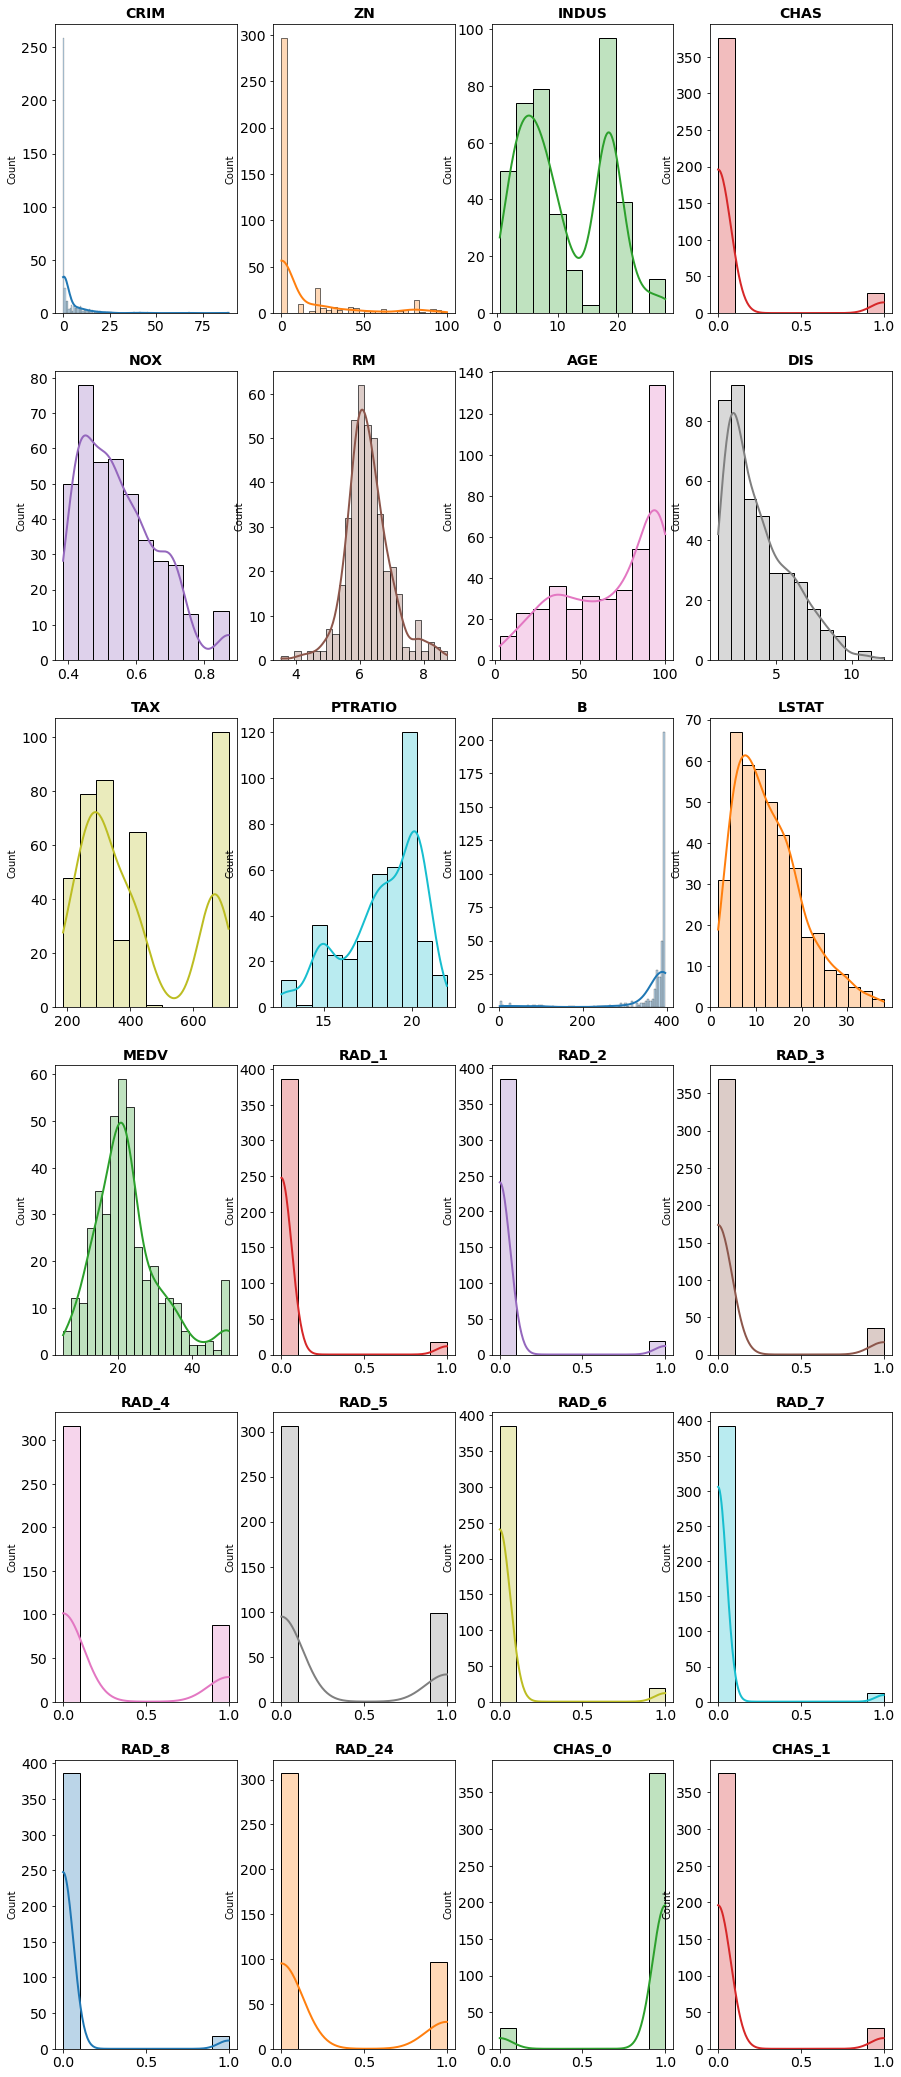

In [180]:
# Distribution graph for each variable

df=dfD2

fig, axes = plt.subplots(ncols=4, nrows=6, figsize=(15, 15))
axes = axes.flat
columnas_numeric = df.columns


for ii, column in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = column,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*3)[ii]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[ii]
    )
    axes[ii].set_title(column, fontsize = 14, fontweight = "bold")
    axes[ii].tick_params(labelsize = 14)
    axes[ii].set_xlabel("")
    
plt.subplots_adjust(top = 2)